In [2]:
import numpy as np
from UZ_utils import *
import cv2
from matplotlib import pyplot as plt

# Exercise 1

### a

In [149]:
def myhist3(arr, n):
    min = np.min(arr)
    max = np.max(arr)
    # print(max)
    # print(min)
    diff = max - min
    shape = arr.shape
    arr = arr.reshape((shape[0] * shape[1], 3))
    print(arr)
    arr = ((arr.astype(np.float64) - min) / diff) * (n-1)
    arr = arr.astype(np.uint8)
    counts = np.zeros((n, n, n))
    for pixel in arr:
        counts[pixel[0], pixel[1], pixel[2]] += 1
    
    return counts / len(arr)

Example of use 1.a

In [148]:
img = cv2.imread('images/obama.jpg') # 0-255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
n_bins = 10
histogram = myhist3(img, n_bins)

255
0
[[45 44 42]
 [51 50 48]
 [58 57 53]
 ...
 [12 11 19]
 [12 11 19]
 [12 11 19]]


In [119]:
# print(histogram)
sum = 0.0
for a in histogram:
    for b in a:
        for c in b:
            sum += c
print(sum)


0.9999999999999999


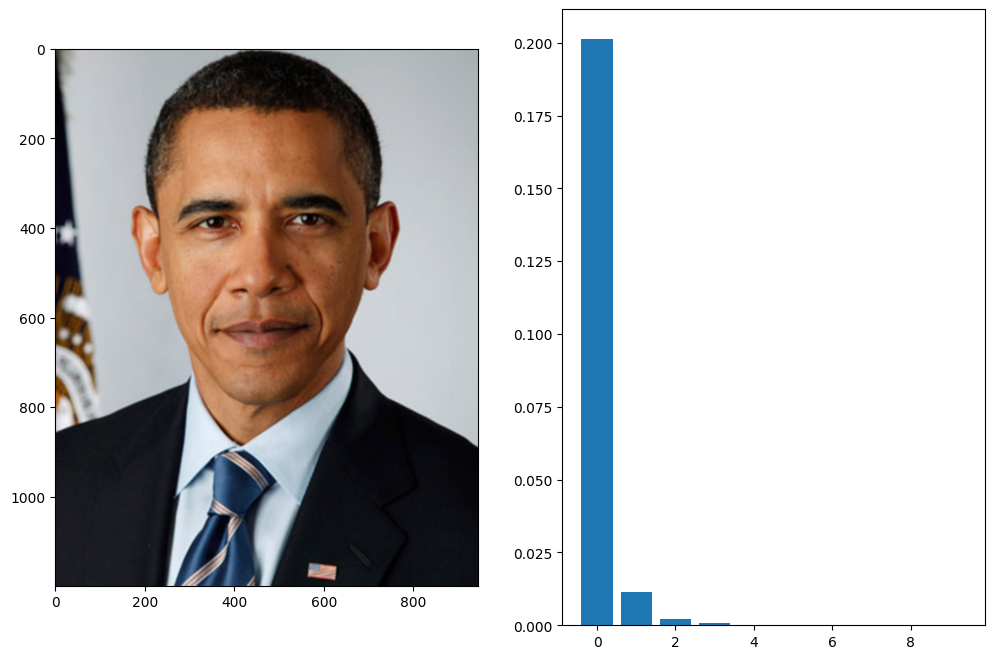

In [21]:

f = plt.figure(figsize=(12, 8))
f.add_subplot(1, 2, 1)
plt.imshow(img)
f.add_subplot(1, 2, 2)
plt.bar(np.arange(n_bins), histogram[:, 0, 0])
# f.add_subplot(1, 4, 3)
# plt.bar(np.arange(n_bins), histogram[:, 100, 100])
# f.add_subplot(1, 4, 4)
# plt.bar(np.arange(n_bins), histogram[:, 200, 200])

plt.show()


### b 

In [120]:
def compare_histograms(hist1, hist2, method):
    hist1 = hist1.reshape(-1) # turn histograms in 1D array
    hist2 = hist2.reshape(-1)
    if method == "L2":
        print("L2")
        return np.sqrt(np.sum((hist1 - hist2) * (hist1 - hist2)))
    elif method == "x^2":
        print("x^2")
        return 0.5 * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1.0e-10))
    elif method == "I":
        print("I")
        return 1 - np.sum(np.minimum(hist1, hist2))
    elif method == "H":
        print("H")
        return np.sqrt(0.5 * np.sum((np.sqrt(hist1) - np.sqrt(hist2)) ** 2))
    else:
        print("Method not implemented")

In [89]:
# compare_histograms(np.array([[0, 1, 2], [3, 4, 5]]),np.array([[[0], [1], [1]], [[0], [0], [4]]]), "H")
# np.minimum([1, 2, 3], [3, -1, 5])

### c

In [151]:
obj1_1 = cv2.imread('dataset/object_01_1.png') # 0-255
obj1_1 = cv2.cvtColor(obj1_1, cv2.COLOR_BGR2RGB)
obj2_1 = cv2.imread('dataset/object_02_1.png') # 0-255
obj2_1 = cv2.cvtColor(obj2_1, cv2.COLOR_BGR2RGB)
obj3_1 = cv2.imread('dataset/object_03_1.png') # 0-255
obj3_1 = cv2.cvtColor(obj3_1, cv2.COLOR_BGR2RGB)

n_bins = 4
hist1 = myhist3(obj1_1, n_bins)
hist2 = myhist3(obj2_1, n_bins)
hist3 = myhist3(obj3_1, n_bins)
hist1 = hist1.reshape(-1)
hist2 = hist2.reshape(-1)
hist3 = hist3.reshape(-1)

[[53 51 32]
 [53 51 10]
 [25 25 25]
 ...
 [25 25 25]
 [25 25 25]
 [25 25 25]]
[[53 51 32]
 [53 51 10]
 [27 27 27]
 ...
 [25 27 23]
 [27 27 27]
 [27 27 27]]
[[53 51 32]
 [53 51 10]
 [25 25 25]
 ...
 [25 25 25]
 [25 25 25]
 [25 25 25]]


In [152]:
value1 = compare_histograms(hist1, hist1, "L2")
print(value1)
value2 = compare_histograms(hist1, hist2, "L2")
print(value2)
value3 = compare_histograms(hist1, hist3, "L2")
print(value3)
# value = compare_histograms(hist1, hist2, "L2")
# print(value)
# value = compare_histograms(hist1, hist2, "x^2")
# print(value)
# value = compare_histograms(hist1, hist2, "I")
# print(value)
# value = compare_histograms(hist1, hist2, "H")
# print(value)

L2
0.0
L2
0.4188650983654981
L2
0.09051519845354647


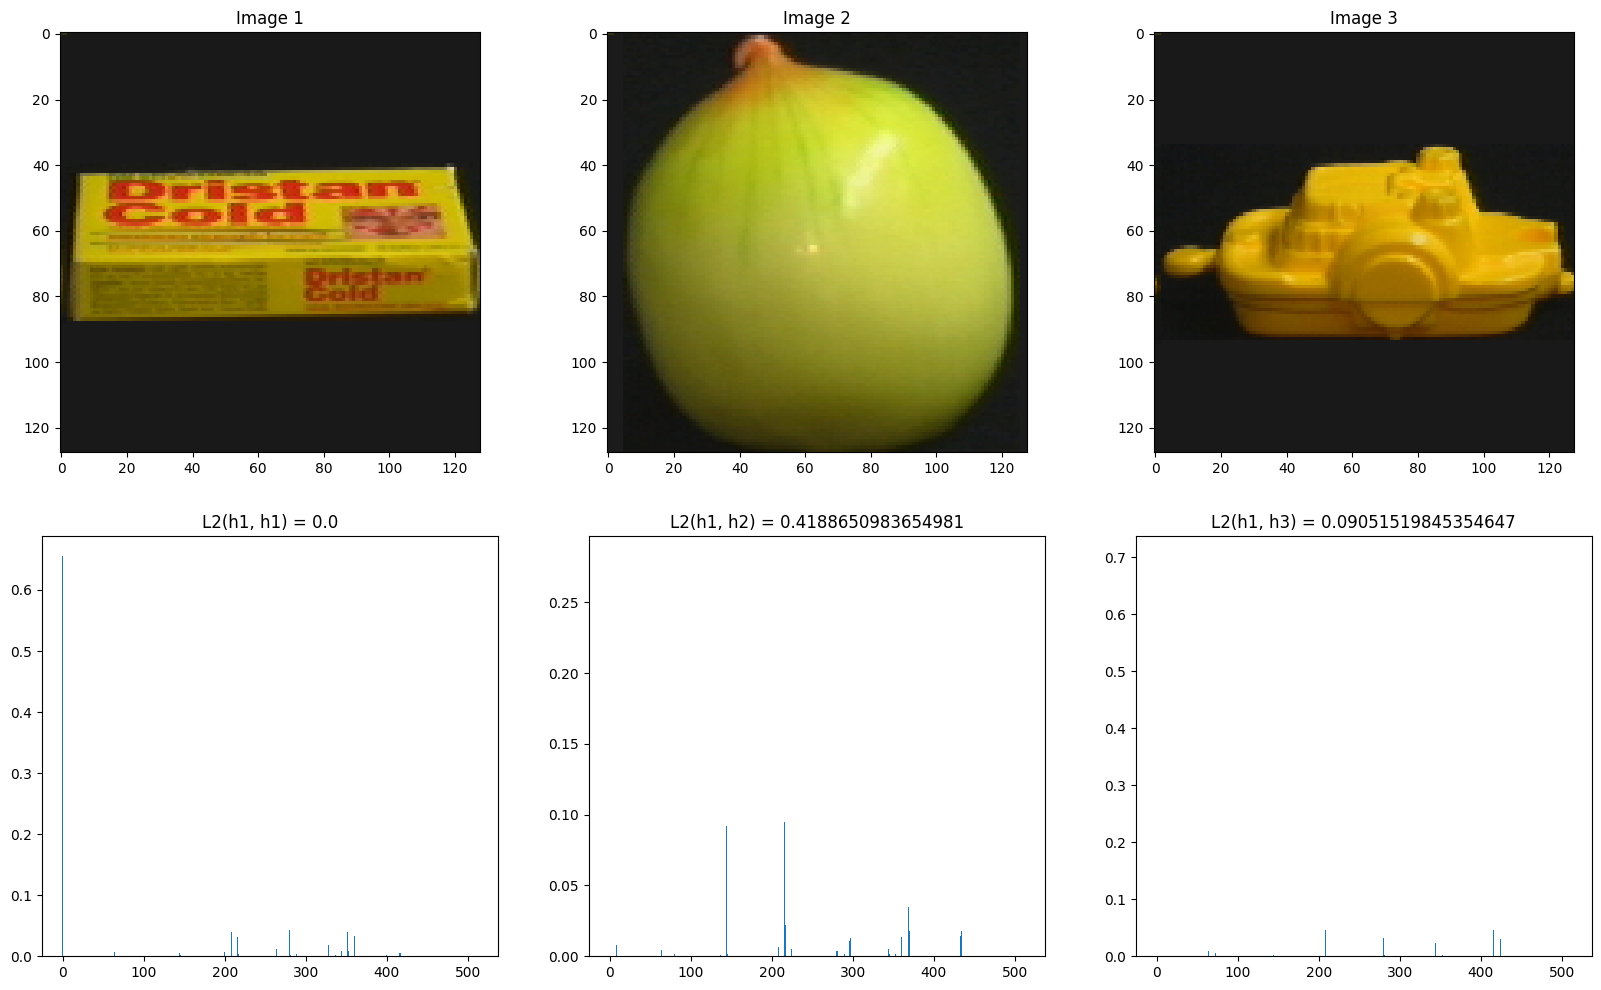

In [153]:
f = plt.figure(figsize=(20, 12))
f.add_subplot(2, 3, 1)
plt.imshow(obj1_1)
plt.title("Image 1")
f.add_subplot(2, 3, 2)
plt.imshow(obj2_1)
plt.title("Image 2")
f.add_subplot(2, 3, 3)
plt.imshow(obj3_1)
plt.title("Image 3")
f.add_subplot(2, 3, 4)
plt.bar(np.arange(n_bins**3), hist1)
plt.title(f"L2(h1, h1) = {value1}")
f.add_subplot(2, 3, 5)
plt.bar(np.arange(n_bins**3), hist2)
plt.title(f"L2(h1, h2) = {value2}")
f.add_subplot(2, 3, 6)
plt.bar(np.arange(n_bins**3), hist3)
plt.title(f"L2(h1, h3) = {value3}")
plt.show()

### d